## 우체국 군집분석

In [1]:
# 모듈 호출
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('postshop_data.csv')
df.head()

,Post,세대사업체,가중면적,통상물량,방문점,Y
0,서울중앙,2384.856353,0.170287,592.014750,183.988196,0
1,광화문,2352.550770,0.179877,681.226601,186.721916,0
2,서대문,2496.504190,0.183269,757.594318,185.824437,0
3,동대문,2561.691159,0.175101,705.349261,166.631332,0
4,서울광진,2564.965414,0.179856,700.896688,181.858226,0


In [3]:
df.shape

(417, 6)

In [4]:
X1 = df.iloc[:, [1, 5]].values # 세대사업체
X2 = df.iloc[:, [2, 5]].values # 가중면적
X3 = df.iloc[:, [3, 5]].values # 통상물량
X4 = df.iloc[:, [4, 5]].values # 방문전

### 1. k-means 군집분석(군집 수: 40개)

In [5]:
#k-means 클러스터링(군집개수:40, 초기시작점: k-means++, 반복: 1000회)
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=40, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X1)
model2 = KMeans(n_clusters=40, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X2)
model3 = KMeans(n_clusters=40, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X3)
model4 = KMeans(n_clusters=40, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X4)

In [6]:
res = pd.DataFrame([model1.labels_,model2.labels_,model3.labels_,model4.labels_])
res

,0,1,2,3,4,5,6,7,8,9,...,407,408,409,410,411,412,413,414,415,416
0,4,4,17,7,7,17,5,7,17,24,...,8,11,35,6,31,0,18,16,27,0
1,29,29,29,29,29,14,14,29,29,29,...,36,25,25,1,25,3,1,31,12,18
2,36,21,18,14,14,21,14,5,31,11,...,7,34,36,21,17,0,14,21,4,0
3,36,36,36,8,4,14,14,26,25,25,...,15,32,15,33,24,12,2,1,6,39


In [7]:
res.to_csv("res_40.csv",index=False,header=False)

### 1.1 최적 군집개수 찾기

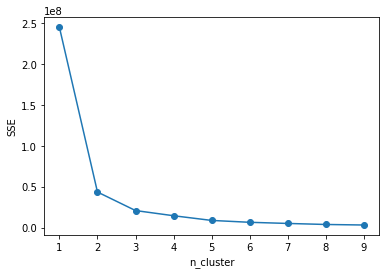

In [8]:
#세대사업체 최적 군집개수 찾기
sse = []
for i in range(1,10):
    model = KMeans(n_clusters=i, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X1)
    sse.append(model.inertia_)
plt.plot(range(1,10), sse, marker='o')
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

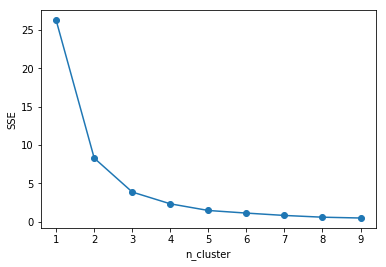

In [9]:
#가중면적 최적 군집개수 찾기
sse = []
for i in range(1,10):
    model = KMeans(n_clusters=i, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X2)
    sse.append(model.inertia_)
plt.plot(range(1,10), sse, marker='o')
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

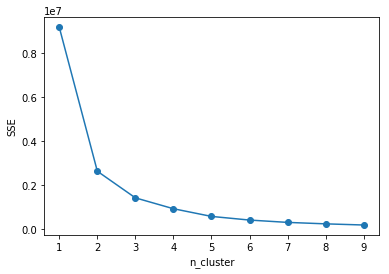

In [10]:
#통상물량 최적 군집개수 찾기
sse = []
for i in range(1,10):
    model = KMeans(n_clusters=i, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X3)
    sse.append(model.inertia_)
plt.plot(range(1,10), sse, marker='o')
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

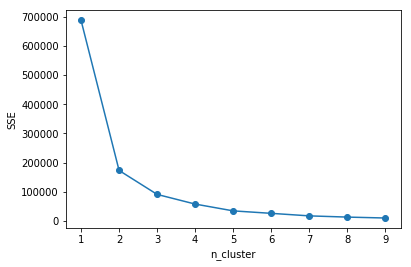

In [11]:
#방문점 최적 군집개수 찾기
sse = []
for i in range(1,10):
    model = KMeans(n_clusters=i, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X4)
    sse.append(model.inertia_)
plt.plot(range(1,10), sse, marker='o')
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

### 1.2 k-means 군집분석(군집 수: 4개)

In [12]:
#k-means 클러스터링(군집개수:4, 초기시작점: k-means++, 반복: 1000회)
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=4, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X1)
model2 = KMeans(n_clusters=4, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X2)
model3 = KMeans(n_clusters=4, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X3)
model4 = KMeans(n_clusters=4, init="k-means++", n_init=1, max_iter=1000, random_state=1).fit(X4)

In [13]:
res2 = pd.DataFrame([model1.labels_,model2.labels_,model3.labels_,model4.labels_])
res2

,0,1,2,3,4,5,6,7,8,9,...,407,408,409,410,411,412,413,414,415,416
0,2,2,0,0,0,0,0,0,0,2,...,3,3,1,1,1,0,2,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,3,1,2,1,3
2,1,3,3,3,3,3,3,3,3,1,...,1,2,1,3,1,0,3,3,3,0
3,0,0,0,0,0,0,0,0,0,0,...,1,3,1,2,2,2,2,1,1,0


In [14]:
res2.to_csv("res_4.csv",index=False,header=False)

### 2 AP 군집분석

In [15]:
#거리기반 유사도 계산
from sklearn.metrics import pairwise_distances
dist_out1 = 1-pairwise_distances(X1)
dist_out2 = 1-pairwise_distances(X2)
dist_out3 = 1-pairwise_distances(X3)
dist_out4 = 1-pairwise_distances(X4)

In [16]:
# AP 클러스터링
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation().fit(dist_out1)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
n_clusters_

111

In [17]:
# AP 클러스터링
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation().fit(dist_out2)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
n_clusters_

257

In [18]:
# AP 클러스터링
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation().fit(dist_out3)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
n_clusters_

269

In [19]:
# AP 클러스터링
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation().fit(dist_out4)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
n_clusters_ 

212

클러스터 개수가 각각 (111/257/269/212)개로 도출되어 사용하기에 적합하지 않음

### 3 Agglomerative 군집분석

In [20]:
# Agglomerative 군집
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering().fit(X1)


In [21]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [22]:
model.n_clusters

2

클러스터 개수가 2개로 너무 적은 군집으로 분류하여 적합하지 않음